In [18]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pymatgen.analysis.diffraction.xrd import *
from tabulate import tabulate

In [2]:
mp_key = "zwe7ZzatCkKkvB6PUpwVmS0nGdBcJr1R"
mp_id = "mp-1569"

In [3]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
    el_bs = m.get_bandstructure_by_material_id(mp_id)
    el_dos = m.get_dos_by_material_id(mp_id)
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)
    ph_dos = m.get_phonon_dos_by_material_id(mp_id)
conv_struc = SpacegroupAnalyzer(prim_struc).get_conventional_standard_structure()
symmops = SpacegroupAnalyzer(conv_struc).get_space_group_operations()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# Analyse du diffractrogramme

In [14]:
calculator = XRDCalculator(1.54060)

In [7]:
print("1er pic : Intensité =",calculator.get_pattern(prim_struc).y[0],"; les Indices hkl associés =", calculator.get_pattern(prim_struc,True).hkls[0][0]['hkl'])
print("2ème pic : Intensité =",calculator.get_pattern(prim_struc).y[1],"; Indices hkl associés =", calculator.get_pattern(prim_struc,True).hkls[1][0]['hkl'])
print("3ème pic : Intensité =",calculator.get_pattern(prim_struc).y[2],"; Indices hkl associés =", calculator.get_pattern(prim_struc,True).hkls[2][0]['hkl'])

1er pic : Intensité = 50.00014923512994 ; les Indices hkl associés = (0, 0, 1)
2ème pic : Intensité = 50.00007963646981 ; Indices hkl associés = (0, 1, 0)
3ème pic : Intensité = 100.0 ; Indices hkl associés = (1, 1, 1)


In [16]:
xrd = XRDCalculator(symprec=0.1)
xrdpattern = xrd.get_pattern(prim_struc)
hkls = xrdpattern.hkls

-----------------  ------------------  -
pic n°1 :
Angle 2θ :         35.970047743587706  °
Intensité :        88.09586116632006   %
Indices (h,k,l) :  (1, 1, 1)
-----------------  ------------------  -


-----------------  ------------------  -
pic n°2 :
Angle 2θ :         41.775104477492484  °
Intensité :        1.4725692759684916  %
Indices (h,k,l) :  (2, 0, 0)
-----------------  ------------------  -


-----------------  -----------------  -
pic n°3 :
Angle 2θ :         60.55873474633165  °
Intensité :        100.0              %
Indices (h,k,l) :  (2, 2, 0)
-----------------  -----------------  -




AttributeError: 'Axes' object has no attribute 'show'

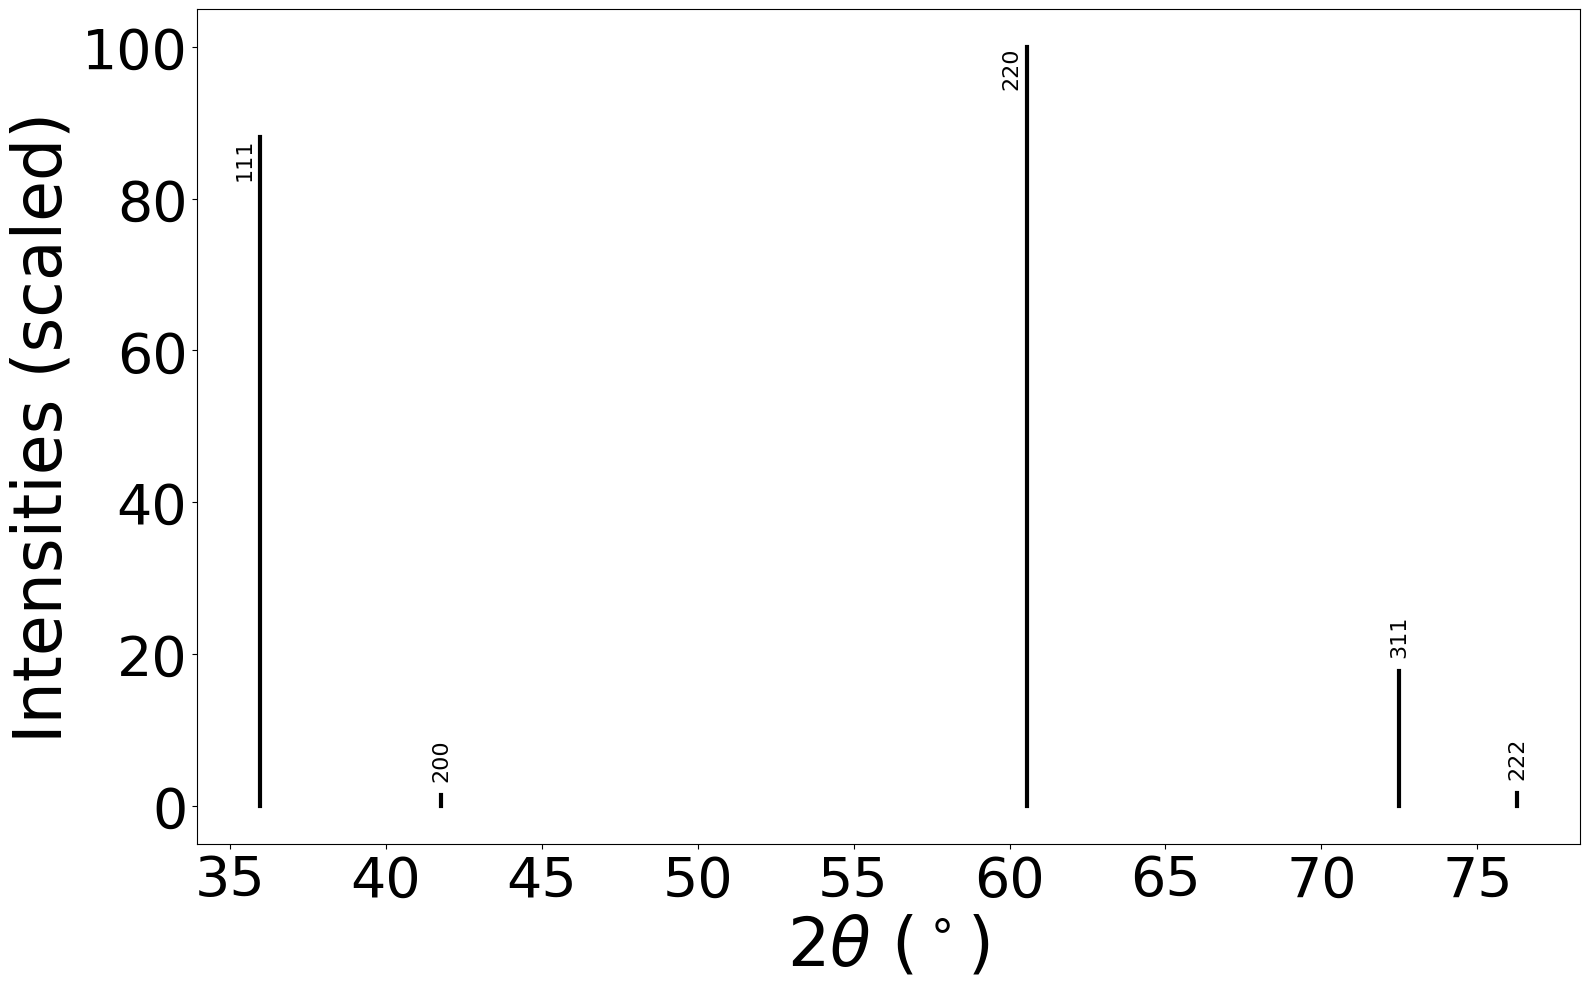

In [32]:
for i in range(0,3):
        print(tabulate([
            ["pic n\u00b0"+str(i+1)+" :\n",""],
            ["Angle 2\u03B8 : ",str(xrdpattern.x[i]), "°"],
            ["Intensité : ",str(xrdpattern.y[i]), "%"],
            ["Indices (h,k,l) : ",str(xrdpattern.hkls[i][0]['hkl'])]]))
        print("\n")       
xrd.show_plot(prim_struc)